<div style="text-align: center;">
    <img src="https://media.licdn.com/dms/image/v2/D5612AQHAMDWC4URvnw/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1703585611284?e=1745452800&v=beta&t=bAUlHqwbzl0t_Wh93FvrG7FrWE08Uizh7NXtV12FqjY" alt="Numpy Logo" width="500">
    <p style="font-size: 50px; font-weight: bold;">Detecting Phishing Emails</p>
    <p style="font-size: 50px; font-weight: normal;"> Intern BCC 2025</p>
</div>

In [33]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score)
from urllib.parse import urlparse
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
import os
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
# 2. Load dataset (email.csv)
#Lakukan preprocessing:
#    a. Ubah semua teks (subject, body) menjadi lowercase
#    b. Hapus karakter selain huruf dan spasi pada subject dan body
#    c. Ekstrak jumlah URL dari kolom urls
# Gabungkan kolom subject dan body menjadi satu kolom "text"
# Gunakan CountVectorizer atau TF-IDF untuk mengubah teks (subject + body) menjadi fitur numerik
# Gabungkan fitur numerik teks dengan fitur jumlah URL
# Pisahkan dataset menjadi data pelatihan (70%) dan data pengujian (30%)
# Pilih model (Voting Classifier dengan Naive Bayes dan SVM)
# Latih model menggunakan data pelatihan
# Evaluasi model menggunakan data pengujian:
# Hitung akurasi
# Hitung precision, recall, dan F1-score
# Untuk prediksi email baru:
# Preprocess email baru (text, url count)
# Gunakan model untuk memprediksi apakah email phishing atau tidak##

# Data Processing

proses pengumpulan data mentah dan mentransformasi data tersebut menjadi informasi

# Data Cleaning
- Menghapus karakter aneh
- Menghapus tanda baca dan HTML tags

In [35]:
input_paths = []
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        input_paths.append(file_path)

../data\CEAS_08.csv
../data\Enron.csv
../data\Ling.csv
../data\Nazario.csv
../data\Nigerian_Fraud.csv
../data\phishing_email.csv
../data\SpamAssasin.csv


In [36]:
# # Remove unwanted files (adjust these paths as needed)
# for unwanted in ["../data/phishing_email.csv",
#                 "../data/Enron.csv",
#                 "../data/Ling.csv",
#                 "../data/Nigerian_Fraud.csv"]:
#     if unwanted in input_paths:
#         input_paths.remove(unwanted)

In [ ]:
dataframes = [pd.read_csv(path) for path in input_paths]
df = pd.concat(dataframes, axis=0, ignore_index=True)
df = df.dropna(subset=['body'])
df.reset_index(drop=True, inplace=True)

In [38]:
# Basic EDA
print(df.head())
print(df.info())
print(df.isnull().sum())

                                              sender  \
0                   Young Esposito <Young@iworld.de>   
1                       Mok <ipline's1983@icable.ph>   
2  Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                 Michael Parker <ivqrnai@pobox.com>   
4  Gretchen Suggs <externalsep1@loanofficertool.com>   

                                         receiver  \
0                     user4@gvc.ceas-challenge.cc   
1                   user2.2@gvc.ceas-challenge.cc   
2                   user2.9@gvc.ceas-challenge.cc   
3  SpamAssassin Dev <xrh@spamassassin.apache.org>   
4                   user2.2@gvc.ceas-challenge.cc   

                              date  \
0  Tue, 05 Aug 2008 16:31:02 -0700   
1  Tue, 05 Aug 2008 18:31:03 -0500   
2  Tue, 05 Aug 2008 20:28:00 -1200   
3  Tue, 05 Aug 2008 17:31:20 -0600   
4  Tue, 05 Aug 2008 19:31:21 -0400   

                                             subject  \
0                          Never agree to be a loser   
1  

In [39]:
df1 = pd.read_csv('../data/CEAS_08.csv')
df1.head()
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

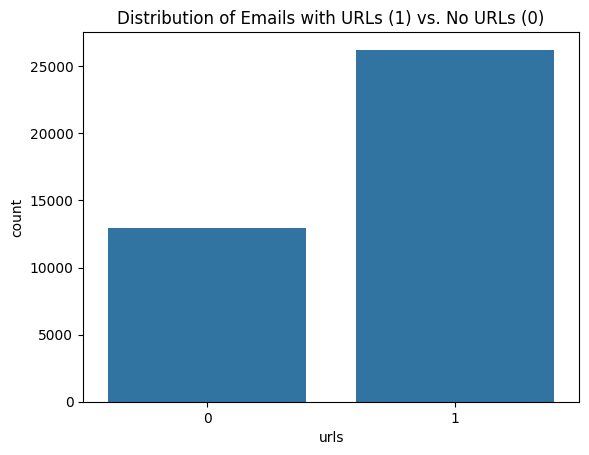

In [40]:
sns.countplot(x='urls', data=df1)
plt.title('Distribution of Emails with URLs (1) vs. No URLs (0)')
plt.show()

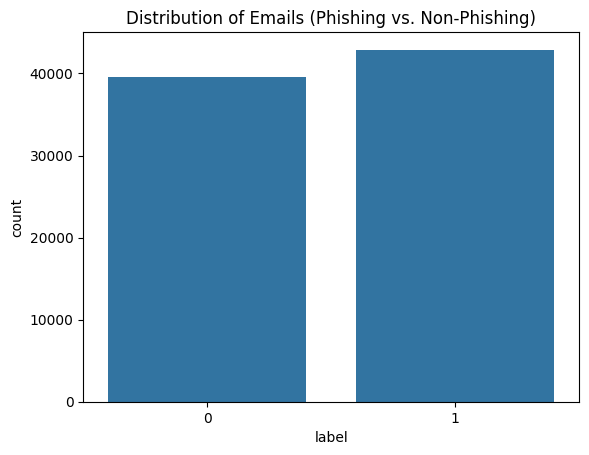

In [41]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Emails (Phishing vs. Non-Phishing)')
plt.show()

In [42]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'text_combined'],
      dtype='object')

In [43]:
df.head()

,sender,receiver,date,subject,body,label,urls,text_combined
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1.0,NaN


In [44]:
df.loc[1:10, ["date"]]

,date
1,"Tue, 05 Aug 2008 18:31:03 -0500"
2,"Tue, 05 Aug 2008 20:28:00 -1200"
3,"Tue, 05 Aug 2008 17:31:20 -0600"
4,"Tue, 05 Aug 2008 19:31:21 -0400"
5,"Wed, 06 Aug 2008 05:31:22 +0600"
6,"Tue, 05 Aug 2008 21:44:01 +0000"
7,"Tue, 05 Aug 2008 20:41:14 -0300"
8,"Tue, 05 Aug 2008 15:31:03 -0800"
9,"Wed, 06 Aug 2008 00:31:38 +0100"
10,"Tue, 05 Aug 2008 21:44:06 +0000"


In [45]:
df.shape

(82485, 8)

In [46]:
df["date"] = pd.to_datetime(df["date"], errors="coerce", utc=True)

df["year"] = df["date"].dt.year

year_range = (df["year"].min(), df["year"].max())
year_range


(1980.0, 2100.0)

In [47]:
df["date"].head(10)

0   2008-08-05 23:31:02+00:00
1   2008-08-05 23:31:03+00:00
2   2008-08-06 08:28:00+00:00
3   2008-08-05 23:31:20+00:00
4   2008-08-05 23:31:21+00:00
5   2008-08-05 23:31:22+00:00
6   2008-08-05 21:44:01+00:00
7   2008-08-05 23:41:14+00:00
8   2008-08-05 23:31:03+00:00
9   2008-08-05 23:31:38+00:00
Name: date, dtype: datetime64[ns, UTC]

In [49]:
df.isna()

,sender,receiver,date,subject,body,label,urls,text_combined,year
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
82480,False,False,False,False,False,False,False,True,False
82481,False,False,False,False,False,False,False,True,False
82482,False,False,False,False,False,False,False,True,False
82483,False,False,False,False,False,False,False,True,False


In [50]:
df.duplicated

<bound method DataFrame.duplicated of                                                   sender  \
0                       Young Esposito <Young@iworld.de>   
1                           Mok <ipline's1983@icable.ph>   
2      Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                     Michael Parker <ivqrnai@pobox.com>   
4      Gretchen Suggs <externalsep1@loanofficertool.com>   
...                                                  ...   
82480  Professional_Career_Development_Institute@Frug...   
82481                          "IQ - TBA" <tba@insiq.us>   
82482                               Mike <raye@yahoo.lv>   
82483                   "Mr. Clean" <cweqx@dialix.oz.au>   
82484  "wilsonkamela400@netscape.net" <wilsonkamela50...   

                                             receiver  \
0                         user4@gvc.ceas-challenge.cc   
1                       user2.2@gvc.ceas-challenge.cc   
2                       user2.9@gvc.ceas-challenge.cc   
3      SpamAs

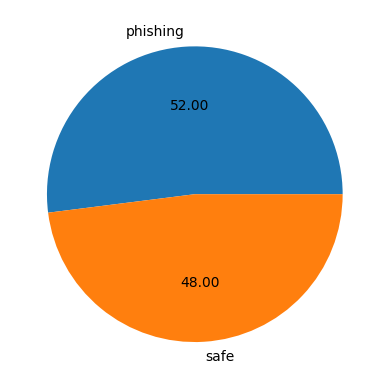

In [52]:
df['label'].value_counts()
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['phishing','safe'],autopct="%0.2f")
plt.show()

In [53]:
# Define a function to extract URLs from text
def extract_urls(text):
    # Regex pattern to match URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    
    # Find all URLs in the text
    urls = re.findall(url_pattern, text)
    
    # Replace URLs in the body with the text 'url'
    text_without_urls = re.sub(url_pattern, 'url', text)
    
    return text_without_urls, urls

# Apply the function to the 'body' column
df['body'], df['extracted_urls'] = zip(*df['body'].apply(extract_urls))

# Check the first few rows to verify the changes
df[['body', 'extracted_urls']].head()

,body,extracted_urls
0,"Buck up, your troubles caused by small dimensi...",[http://whitedone.com/]
1,\nUpgrade your sex and pleasures with these te...,[http://www.brightmade.com]
2,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,[http://www.cnn.com/video/partners/email/index...
3,Would anyone object to removing .so from this ...,[http://en.wikipedia.org/wiki/.so_%28domain_na...
4,\nWelcomeFastShippingCustomerSupport\nurl\n\n\n,[http://7iwfna.blu.livefilestore.com/y1pXdX3kw...


In [54]:
df['extracted_urls'].describe()

count     82485
unique    14513
top          []
freq      50405
Name: extracted_urls, dtype: object

In [55]:
df.head()

,sender,receiver,date,subject,body,label,urls,text_combined,year,extracted_urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,2008-08-05 23:31:02+00:00,Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1.0,NaN,2008.0,[http://whitedone.com/]
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,2008-08-05 23:31:03+00:00,Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1.0,NaN,2008.0,[http://www.brightmade.com]
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,2008-08-06 08:28:00+00:00,CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1.0,NaN,2008.0,[http://www.cnn.com/video/partners/email/index...
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,2008-08-05 23:31:20+00:00,Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1.0,NaN,2008.0,[http://en.wikipedia.org/wiki/.so_%28domain_na...
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,2008-08-05 23:31:21+00:00,SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nurl\n\n\n,1,1.0,NaN,2008.0,[http://7iwfna.blu.livefilestore.com/y1pXdX3kw...


In [56]:
df1.isna().sum()

sender        0
receiver    462
date          0
subject      28
body          0
label         0
urls          0
dtype: int64

In [57]:
df1.drop_duplicates

<bound method DataFrame.drop_duplicates of                                                   sender  \
0                       Young Esposito <Young@iworld.de>   
1                           Mok <ipline's1983@icable.ph>   
2      Daily Top 10 <Karmandeep-opengevl@universalnet...   
3                     Michael Parker <ivqrnai@pobox.com>   
4      Gretchen Suggs <externalsep1@loanofficertool.com>   
...                                                  ...   
39149    CNN Alerts <charlene-detecton@btcmarketing.com>   
39150           CNN Alerts <idgetily1971@careplusnj.org>   
39151                   Abhijit Vyas <xpojhbz@gmail.com>   
39152              Joseph Brennan <vupzesm@columbia.edu>   
39153                Christian Heimes <wluhe@cheimes.de>   

                                             receiver  \
0                         user4@gvc.ceas-challenge.cc   
1                       user2.2@gvc.ceas-challenge.cc   
2                       user2.9@gvc.ceas-challenge.cc   
3      S

In [58]:
df1.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')

In [59]:
df1["urls"]

0        1
1        1
2        1
3        1
4        1
        ..
39149    0
39150    0
39151    0
39152    0
39153    1
Name: urls, Length: 39154, dtype: int64

In [60]:
df1["urls"].sum()

26232

In [61]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'text_combined', 'year', 'extracted_urls'],
      dtype='object')

In [62]:
df['extracted_urls'].head(20)

0                               [http://whitedone.com/]
1                           [http://www.brightmade.com]
2     [http://www.cnn.com/video/partners/email/index...
3     [http://en.wikipedia.org/wiki/.so_%28domain_na...
4     [http://7iwfna.blu.livefilestore.com/y1pXdX3kw...
5                                                    []
6                                                    []
7     [http://www.cnn.com/video/partners/email/index...
8     [http://issues.apache.org/SpamAssassin/show_bu...
9     [http://www.cnn.com/video/partners/email/index...
10                         [http://freshplateworks.com]
11                             [http://oemmerchant.com]
12    [http://www.cnn.com/video/partners/email/index...
13    [http://www.cnn.com/video/partners/email/index...
14                                [http://pacelike.com]
15    [http://ieinternet.com/mailwall/), http://iein...
16    [http://www.cnn.com/video/partners/email/index...
17    [http://www.cnn.com/video/partners/email/i

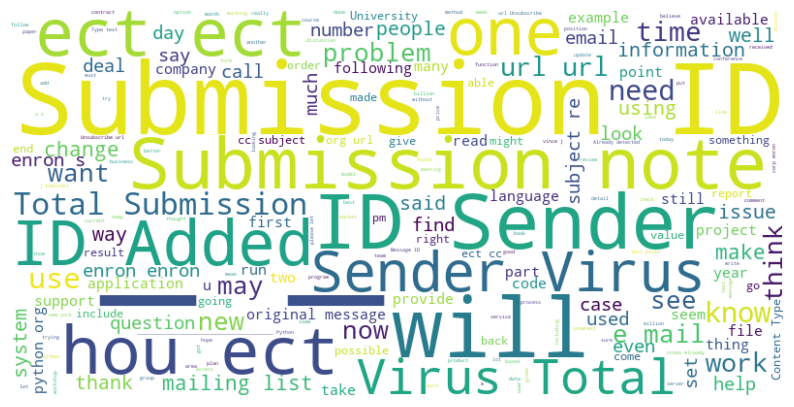

In [63]:
safe_email = df[df["label"] == 0]
safe_text = " ".join(safe_email["body"])
word_cloud = WordCloud(width=800,height=400,background_color="white").generate(safe_text)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

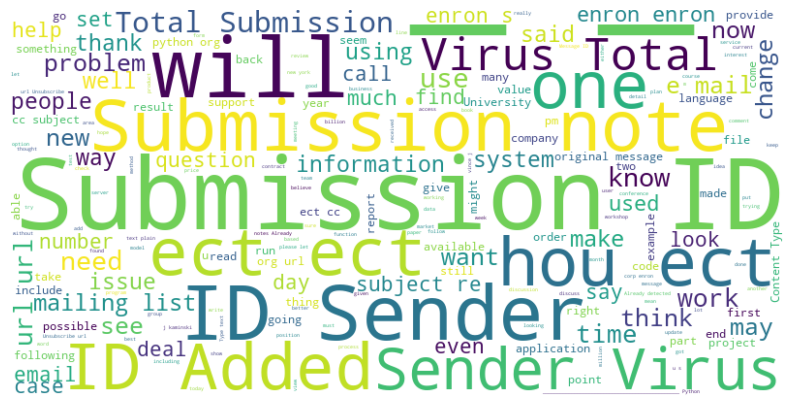

In [64]:
safe_email = df[df["label"] == 0]
safe_text = " ".join(safe_email["body"])
word_cloud = WordCloud(width=800,height=400,background_color="white").generate(safe_text)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

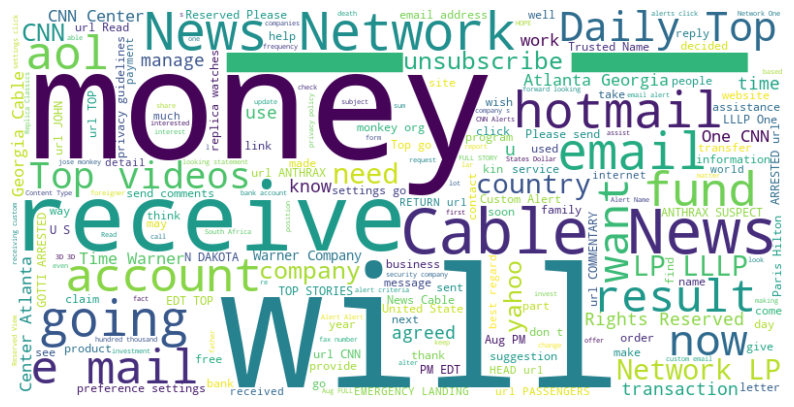

In [65]:
phishing_email = df[df["label"] == 1]
phishing_text = " ".join(phishing_email["body"])
word_cloud = WordCloud(width=800,height=400,background_color="white").generate(phishing_text)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Text Cleaning Function

In [83]:
# 1. Tokenization and Vectorization: TF-IDF Vectorization for the cleaned email bodies
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # You can adjust max_features as needed
X_text = vectorizer.fit_transform(df['cleaned_body']).toarray()

# 2. Feature Engineering

# Feature 1: URLs - Number of URLs present in the email
df['num_urls'] = df['extracted_urls'].apply(len)

# Feature 2: Email Metadata - Extract domain from sender's email address
df['sender_domain'] = df['sender'].apply(lambda x: x.split('@')[-1] if '@' in x else 'unknown')

# Feature 3: Length Features
df['body_length'] = df['cleaned_body'].apply(len)

# 3. Convert categorical email sender domain into numerical representation
df['sender_domain'] = pd.factorize(df['sender_domain'])[0]

TypeError: argument of type 'float' is not iterable

In [68]:
def clean_email_content_with_links(email_body):
    # Preserve URLs by replacing them with placeholders
    urls = re.findall(r'http[s]?://(?:[a-zA-Z0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_body)
    for i, url in enumerate(urls):
        email_body = email_body.replace(url, f"*URL_{i}*")
    # Remove non-alphanumeric characters (except spaces and the URL placeholder pattern)
    email_body = re.sub(r'[^a-zA-Z0-9\s*URL_\d*]', '', email_body)
    # Normalize whitespace
    email_body = re.sub(r'\s+', ' ', email_body).strip()
    return email_body, urls

In [69]:
df['cleaned_body'], df['extracted_urls'] = zip(*df['body'].apply(clean_email_content_with_links))
print(df[['body', 'cleaned_body', 'extracted_urls','label']].head(5))

                                                body  \
0  Buck up, your troubles caused by small dimensi...   
1  \nUpgrade your sex and pleasures with these te...   
2  >+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...   
3  Would anyone object to removing .so from this ...   
4    \nWelcomeFastShippingCustomerSupport\nurl\n\n\n   

                                        cleaned_body extracted_urls  label  
0  Buck up your troubles caused by small dimensio...             []      1  
1  Upgrade your sex and pleasures with these tech...             []      1  
2  THE DAILY TOP 10 from CNNcom Top videos and st...             []      1  
3  Would anyone object to removing so from this l...             []      0  
4             WelcomeFastShippingCustomerSupport url             []      1  


# Feature Engineering

In [73]:
# Text Features for LightGBM: TF-IDF on cleaned body
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_text = tfidf_vectorizer.fit_transform(df['cleaned_body'])
X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
# For Naive Bayes: Use CountVectorizer (word count based)
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_text_nb = count_vectorizer.fit_transform(df['cleaned_body'])
X_text_nb_df = pd.DataFrame(X_text_nb.toarray(), columns=count_vectorizer.get_feature_names_out())

In [75]:
# Additional Numeric Features:
df['num_urls'] = df['extracted_urls'].apply(len)
df['body_length'] = df['cleaned_body'].apply(len)
df['sender_domain'] = df['sender'].apply(lambda x: x.split('@')[-1] if '@' in x else 'unknown')
df['sender_domain'] = pd.factorize(df['sender_domain'])[0]

TypeError: argument of type 'float' is not iterable

In [74]:
# URL Feature Extraction Functions
def get_domain_from_url(url):
    try:
        return urlparse(url).netloc
    except:
        return ''

In [76]:
def count_special_chars(url):
    return len(re.findall(r'[@%&\*\$#\?\+\!]', url))

In [77]:
|def is_url_shortened(url):
    shortened_domains = ['bit.ly', 'tinyurl.com', 'goo.gl']
    domain = get_domain_from_url(url)
    return 1 if any(shortened in domain for shortened in shortened_domains) else 0

SyntaxError: invalid syntax (2146479454.py, line 1)

In [ ]:
def extract_url_features(row):
    urls = row['extracted_urls']
    avg_url_length = sum(len(url) for url in urls) / len(urls) if urls else 0
    num_special_chars = sum(count_special_chars(url) for url in urls)
    has_url_short = sum(is_url_shortened(url) for url in urls)
    num_query_params = sum(url.count('?') for url in urls)
    has_https = sum(1 for url in urls if 'https://' in url)
    suspicious_keywords = ['login', 'bank', 'security', 'account', 'verify']
    num_suspicious_keywords = sum(any(keyword in url for keyword in suspicious_keywords) for url in urls)
    return [avg_url_length, num_special_chars, has_url_short, num_query_params, has_https, num_suspicious_keywords]

url_features = df.apply(lambda row: extract_url_features(row), axis=1)
url_features_df = pd.DataFrame(url_features.tolist(), columns=[
    'avg_url_length', 'num_special_chars',
    'has_url_shortener', 'num_query_params',
    'has_https', 'num_suspicious_keywords_in_urls'
])

In [79]:
# Combine features for LightGBM model
X_lgb = pd.concat([X_text_df, df[['num_urls', 'sender_domain', 'body_length']], url_features_df], axis=1)

KeyError: "['sender_domain'] not in index"

In [82]:
# 5a. LightGBM Classifier
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
lgb_model.fit(X_train_lgb, y_train)
y_pred_lgb = lgb_model.predict(X_test_lgb)
y_pred_proba_lgb = lgb_model.predict_proba(X_test_lgb)[:, 1]

print("LightGBM Performance:")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lgb))

NameError: name 'X_train_lgb' is not defined